In [ ]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from plotly.subplots import make_subplots

In [ ]:
#import fredapi key
from fredapi import Fred

from dotenv import load_dotenv
import os

#Load variables from .env
load_dotenv() 
fred_key = os.getenv("FRED_API_KEY")

#create fred object
fred = Fred(api_key=fred_key)

## Key Questions

- Plot a horizontal bar graph showing the average hourly earnings for each sector, ordered from largest to smallest (trends in wage growth)

- Then, to determine whether wage growth is keeping pace with inflation, I need to calculate real wags first (nominal wage) by dividing average hourly earnings by the CPI. Then i calculate wage growth rate and inflation rate year on year, and plot these two on a line graph and see whether sector specific wage growth is keeping up with inflation


In [41]:
hourly_wage_list = ['CES2000000003','CES6500000003', 'CES5500000003', 'CES5000000003', 'CES7000000003', 'CES3000000003', 'CES6000000003', 'CES4000000003']

In [42]:
hourly_earnings = fred.search('Average Hourly Earnings')
hourly_earnings = hourly_earnings[hourly_earnings['frequency'] == 'Monthly']
hourly_earnings = hourly_earnings[hourly_earnings['id'].isin(hourly_wage_list)]

hourly_earnings

# here, we have all the average hourly earning data for major job sectors of interest

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CES2000000003,CES2000000003,2024-11-15,2024-11-15,"Average Hourly Earnings of All Employees, Cons...",2006-03-01,2024-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2024-11-01 07:48:07-05:00,57,Construction employees in the construction sec...
CES3000000003,CES3000000003,2024-11-15,2024-11-15,"Average Hourly Earnings of All Employees, Manu...",2006-03-01,2024-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2024-11-01 07:48:07-05:00,57,The series comes from the 'Current Employment ...
CES7000000003,CES7000000003,2024-11-15,2024-11-15,"Average Hourly Earnings of All Employees, Leis...",2006-03-01,2024-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2024-11-01 07:48:07-05:00,53,The series comes from the 'Current Employment ...
CES6000000003,CES6000000003,2024-11-15,2024-11-15,"Average Hourly Earnings of All Employees, Prof...",2006-03-01,2024-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2024-11-01 07:48:08-05:00,51,The series comes from the 'Current Employment ...
CES6500000003,CES6500000003,2024-11-15,2024-11-15,"Average Hourly Earnings of All Employees, Priv...",2006-03-01,2024-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2024-11-01 07:48:08-05:00,50,The series comes from the 'Current Employment ...
CES5000000003,CES5000000003,2024-11-15,2024-11-15,"Average Hourly Earnings of All Employees, Info...",2006-03-01,2024-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2024-11-01 07:48:08-05:00,50,The series comes from the 'Current Employment ...
CES5500000003,CES5500000003,2024-11-15,2024-11-15,"Average Hourly Earnings of All Employees, Fina...",2006-03-01,2024-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2024-11-01 07:48:08-05:00,50,The series comes from the 'Current Employment ...
CES4000000003,CES4000000003,2024-11-15,2024-11-15,"Average Hourly Earnings of All Employees, Trad...",2006-03-01,2024-10-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2024-11-01 07:48:17-05:00,4,The series comes from the 'Current Employment ...


In [43]:
hourly_earnings.index

Index(['CES2000000003', 'CES3000000003', 'CES7000000003', 'CES6000000003',
       'CES6500000003', 'CES5000000003', 'CES5500000003', 'CES4000000003'],
      dtype='object', name='series id')

In [44]:
all_results = []

for id in hourly_earnings.index:
    results = fred.get_series(id, observation_start='2019-01-01', observation_end='2024-10-01')
    results = results.to_frame(name=id)
    all_results.append(results)

# here, it goes through the list of series IDs and retreives the corresponding series and stores it in 'results'.
# This is converted into a dataframe and the newly created dataframe is now appended to the 'all_results' list.
# The loop continues, moving onto the nex id to retrieve series and store in 'results'. At the end of the loop,
# all_results will contain a list of DataFrames, each corresponding to a different series from hourly_earnings

In [ ]:
all_results[3]
# series data can be accessed by specifying the index of the list

,CES6000000003
2019-01-01,33.07
2019-02-01,33.25
2019-03-01,33.36
2019-04-01,33.41
2019-05-01,33.50
...,...
2024-06-01,42.15
2024-07-01,42.25
2024-08-01,42.49
2024-09-01,42.77


In [46]:
hourly_earnings_df = pd.concat(all_results, axis=1).dropna()
hourly_earnings_df
# here, we add all the columns in the list side by side

,CES2000000003,CES3000000003,CES7000000003,CES6000000003,CES6500000003,CES5000000003,CES5500000003,CES4000000003
2019-01-01,30.34,27.28,16.28,33.07,27.44,41.71,35.42,23.81
2019-02-01,30.43,27.46,16.40,33.25,27.52,41.73,35.49,23.93
2019-03-01,30.53,27.50,16.43,33.36,27.60,42.08,35.55,24.04
2019-04-01,30.63,27.47,16.47,33.41,27.40,41.82,35.69,24.00
2019-05-01,30.69,27.58,16.51,33.50,27.40,41.98,35.78,24.08
...,...,...,...,...,...,...,...,...
2024-06-01,38.11,34.04,22.06,42.15,34.18,49.57,45.45,29.93
2024-07-01,38.26,34.14,22.14,42.25,34.28,49.80,45.58,29.97
2024-08-01,38.39,34.25,22.17,42.49,34.38,50.38,45.83,30.09
2024-09-01,38.60,34.33,22.19,42.77,34.52,50.47,45.87,30.12


In [47]:
if (hourly_earnings_df.isna().sum(axis=1) > 0).any():
    print('NaN values detected')
else:
    print('No NaN values detected')

No NaN values detected


In [48]:
label_names = {
    'CES2000000003': 'Construction',
    'CES3000000003': 'Manufacturing',
    'CES7000000003': 'Leisure & Hospitality',
    'CES6000000003': 'Professional & Business Services',
    'CES6500000003': 'Education & Health',
    'CES5000000003': 'Information',
    'CES5500000003': 'Financial Activities', 
    'CES4000000003': 'Trade, Transport & Utilities'
    
}

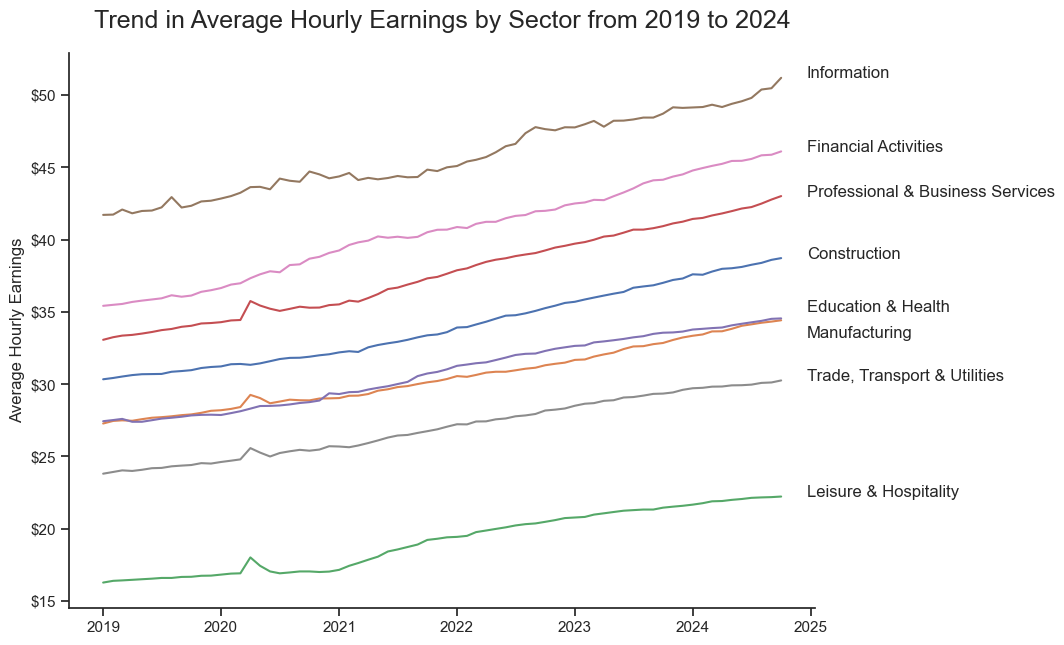

In [50]:
plt.figure(figsize=(10.8, 6.6))
sns.lineplot(hourly_earnings_df, dashes = False)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trend in Average Hourly Earnings by Sector from 2019 to 2024', fontsize=18, y=1.03)
plt.ylabel('Average Hourly Earnings')
plt.legend().set_visible(False)

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))

for i, k in enumerate(label_names):
    offset=0  
    y_val = hourly_earnings_df.iloc[-1, i]
    x_val = hourly_earnings_df.index[-1] 
    x_pos= x_val + pd.Timedelta(days=80)  
    
    if i == 1: 
        offset = 1.2
        y_val = hourly_earnings_df.iloc[-1, i] - offset
    elif i ==4:
        offset =0.5
        y_val = hourly_earnings_df.iloc[-1, i] + offset

    plt.text(x_pos, y_val, label_names[k], fontsize=12)
# Label assignment and separation

plt.tight_layout()


## Calculate sectors with the biggest change in average hourly earnings from 2014 to 2024 (as percentage increase)

In [79]:
change_in_earning_yr = hourly_earnings_df.copy()
change_in_earning_yr

,CES2000000003,CES3000000003,CES7000000003,CES6000000003,CES6500000003,CES5000000003,CES5500000003,CES4000000003
2019-01-01,30.34,27.28,16.28,33.07,27.44,41.71,35.42,23.81
2019-02-01,30.43,27.46,16.40,33.25,27.52,41.73,35.49,23.93
2019-03-01,30.53,27.50,16.43,33.36,27.60,42.08,35.55,24.04
2019-04-01,30.63,27.47,16.47,33.41,27.40,41.82,35.69,24.00
2019-05-01,30.69,27.58,16.51,33.50,27.40,41.98,35.78,24.08
...,...,...,...,...,...,...,...,...
2024-06-01,38.11,34.04,22.06,42.15,34.18,49.57,45.45,29.93
2024-07-01,38.26,34.14,22.14,42.25,34.28,49.80,45.58,29.97
2024-08-01,38.39,34.25,22.17,42.49,34.38,50.38,45.83,30.09
2024-09-01,38.60,34.33,22.19,42.77,34.52,50.47,45.87,30.12


In [67]:
change_in_earning_yr.iloc[60:69]

,CES2000000003,CES3000000003,CES7000000003,CES6000000003,CES6500000003,CES5000000003,CES5500000003,CES4000000003
2024-01-01,37.60,33.35,21.67,41.43,33.78,49.14,44.78,29.72
2024-02-01,37.57,33.44,21.77,41.50,33.83,49.17,44.95,29.75
2024-03-01,37.79,33.65,21.90,41.67,33.88,49.33,45.10,29.83
2024-04-01,37.98,33.66,21.92,41.81,33.92,49.17,45.24,29.84
2024-05-01,38.02,33.83,22.00,41.97,34.07,49.39,45.44,29.92
2024-06-01,38.11,34.04,22.06,42.15,34.18,49.57,45.45,29.93
2024-07-01,38.26,34.14,22.14,42.25,34.28,49.80,45.58,29.97
2024-08-01,38.39,34.25,22.17,42.49,34.38,50.38,45.83,30.09
2024-09-01,38.60,34.33,22.19,42.77,34.52,50.47,45.87,30.12


In [80]:
change_in_earning_yr.loc['2019_avg'] = (change_in_earning_yr.iloc[0:12].sum()/12)
change_in_earning_yr.loc['2024_avg'] = (change_in_earning_yr.iloc[60:70].sum()/10)
change_in_earning_yr.loc['percent diff'] = ((change_in_earning_yr.loc['2024_avg'] - change_in_earning_yr.loc['2019_avg']) / change_in_earning_yr.loc['2019_avg']) * 100

change_in_earning_yr

,CES2000000003,CES3000000003,CES7000000003,CES6000000003,CES6500000003,CES5000000003,CES5500000003,CES4000000003
2019-01-01 00:00:00,30.340000,27.280000,16.280000,33.070000,27.440000,41.710000,35.420000,23.810000
2019-02-01 00:00:00,30.430000,27.460000,16.400000,33.250000,27.520000,41.730000,35.490000,23.930000
2019-03-01 00:00:00,30.530000,27.500000,16.430000,33.360000,27.600000,42.080000,35.550000,24.040000
2019-04-01 00:00:00,30.630000,27.470000,16.470000,33.410000,27.400000,41.820000,35.690000,24.000000
2019-05-01 00:00:00,30.690000,27.580000,16.510000,33.500000,27.400000,41.980000,35.780000,24.080000
...,...,...,...,...,...,...,...,...
2024-09-01 00:00:00,38.600000,34.330000,22.190000,42.770000,34.520000,50.470000,45.870000,30.120000
2024-10-01 00:00:00,38.720000,34.420000,22.230000,43.010000,34.550000,51.190000,46.100000,30.260000
2019_avg,30.756667,27.701667,16.558333,33.683333,27.627500,42.199167,35.912500,24.200833
2024_avg,38.104000,33.911000,22.005000,42.105000,34.139000,49.761000,45.434000,29.943000


In [81]:
diff_hrly_earnings = change_in_earning_yr.loc['percent diff'].sort_values(ascending=False)
diff_hrly_earnings = diff_hrly_earnings.to_frame(name='percent diff')
diff_hrly_earnings.reset_index(inplace=True)

diff_hrly_earnings

,index,percent diff
0,CES7000000003,32.893810
1,CES5500000003,26.513053
2,CES6000000003,25.002474
3,CES2000000003,23.888588
4,CES4000000003,23.727144
5,CES6500000003,23.568908
6,CES3000000003,22.415017
7,CES5000000003,17.919390


In [82]:
label_ordered = {
    'CES7000000003': 'Leisure & Hospitality',
    'CES5500000003': 'Financial Activities', 
    'CES5000000003': 'Information',
    'CES6000000003': 'Professional & Business Services',
    'CES2000000003': 'Construction',
    'CES4000000003': 'Trade, Transport & Utilities',
    'CES6500000003': 'Education & Health',
    'CES3000000003': 'Manufacturing',
    
}

In [83]:
diff_hrly_earnings['sector'] = diff_hrly_earnings['index'].map(label_ordered)
diff_hrly_earnings

,index,percent diff,sector
0,CES7000000003,32.893810,Leisure & Hospitality
1,CES5500000003,26.513053,Financial Activities
2,CES6000000003,25.002474,Professional & Business Services
3,CES2000000003,23.888588,Construction
4,CES4000000003,23.727144,"Trade, Transport & Utilities"
5,CES6500000003,23.568908,Education & Health
6,CES3000000003,22.415017,Manufacturing
7,CES5000000003,17.919390,Information


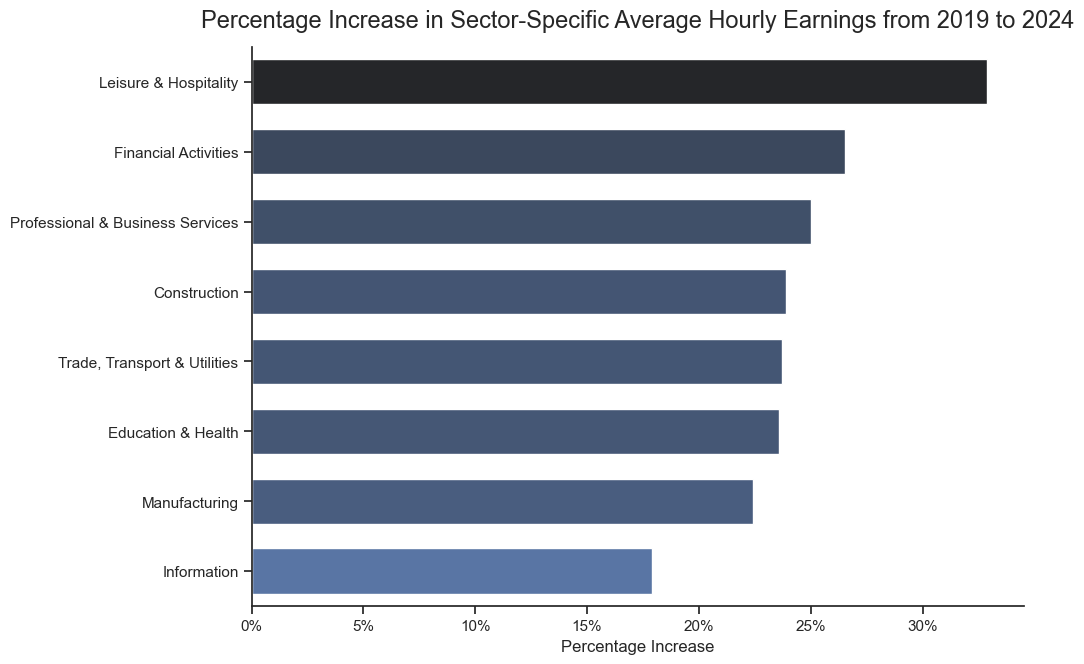

In [93]:
plt.figure(figsize=(10.5, 6.8))

sns.barplot(diff_hrly_earnings, x='percent diff', y='sector', width=0.65, hue='percent diff', palette='dark:b_r')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Percentage Increase in Sector-Specific Average Hourly Earnings from 2019 to 2024', fontsize = 17, y=1.02)
plt.xlabel('Percentage Increase', fontsize=12)
plt.ylabel('')
plt.legend().set_visible(False)
# plt.xticks(range(0,19,1))

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))

plt.tight_layout()

## Is wage growth keeping pace with inflation, allowing workers to maintain purchasing power?

- Here, I am going to calculate Year-on-Year growth rates.
Here, I wont be using sector specific wages, but the average hourly earning

In [103]:
avg_earnings = fred.get_series('CES0500000003',  observation_start='2018-01-01', observation_end='2024-10-01')
avg_earnings

2018-01-01    26.73
2018-02-01    26.75
2018-03-01    26.86
2018-04-01    26.91
2018-05-01    26.98
              ...  
2024-06-01    34.99
2024-07-01    35.07
2024-08-01    35.22
2024-09-01    35.33
2024-10-01    35.46
Length: 82, dtype: float64

In [104]:
avg_earnings.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 82 entries, 2018-01-01 to 2024-10-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
82 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [105]:
CPI = fred.get_series('CPIAUCSL',  observation_start='2018-01-01', observation_end='2024-10-01')
CPI

2018-01-01    248.859
2018-02-01    249.529
2018-03-01    249.577
2018-04-01    250.227
2018-05-01    250.792
               ...   
2024-06-01    313.049
2024-07-01    313.534
2024-08-01    314.121
2024-09-01    314.686
2024-10-01    315.454
Length: 82, dtype: float64

In [106]:
earnings_cpi_data = pd.concat([avg_earnings, CPI], axis=1, join='inner')
earnings_cpi_data

,0,1
2018-01-01,26.73,248.859
2018-02-01,26.75,249.529
2018-03-01,26.86,249.577
2018-04-01,26.91,250.227
2018-05-01,26.98,250.792
...,...,...
2024-06-01,34.99,313.049
2024-07-01,35.07,313.534
2024-08-01,35.22,314.121
2024-09-01,35.33,314.686


In [107]:
earnings_cpi_data = earnings_cpi_data.rename(columns={0: 'Average Earnings', 1: 'CPI'})
earnings_cpi_data

,Average Earnings,CPI
2018-01-01,26.73,248.859
2018-02-01,26.75,249.529
2018-03-01,26.86,249.577
2018-04-01,26.91,250.227
2018-05-01,26.98,250.792
...,...,...
2024-06-01,34.99,313.049
2024-07-01,35.07,313.534
2024-08-01,35.22,314.121
2024-09-01,35.33,314.686


In [108]:
earnings_cpi_data['Inflation rate'] = earnings_cpi_data['CPI'].pct_change(periods=12) * 100
# This calculates the percentage change between the current row and the row 12 periods (months) earlier, which gives you the year-on-year change.
earnings_cpi_data

,Average Earnings,CPI,Inflation rate
2018-01-01,26.73,248.859,NaN
2018-02-01,26.75,249.529,NaN
2018-03-01,26.86,249.577,NaN
2018-04-01,26.91,250.227,NaN
2018-05-01,26.98,250.792,NaN
...,...,...,...
2024-06-01,34.99,313.049,2.975629
2024-07-01,35.07,313.534,2.923566
2024-08-01,35.22,314.121,2.591227
2024-09-01,35.33,314.686,2.407513


In [109]:
earnings_cpi_clean = earnings_cpi_data.dropna().copy()

In [110]:
earnings_cpi_clean

,Average Earnings,CPI,Inflation rate
2019-01-01,27.59,252.561,1.487589
2019-02-01,27.71,253.319,1.518862
2019-03-01,27.80,254.277,1.883186
2019-04-01,27.78,255.233,2.000583
2019-05-01,27.86,255.296,1.795911
...,...,...,...
2024-06-01,34.99,313.049,2.975629
2024-07-01,35.07,313.534,2.923566
2024-08-01,35.22,314.121,2.591227
2024-09-01,35.33,314.686,2.407513


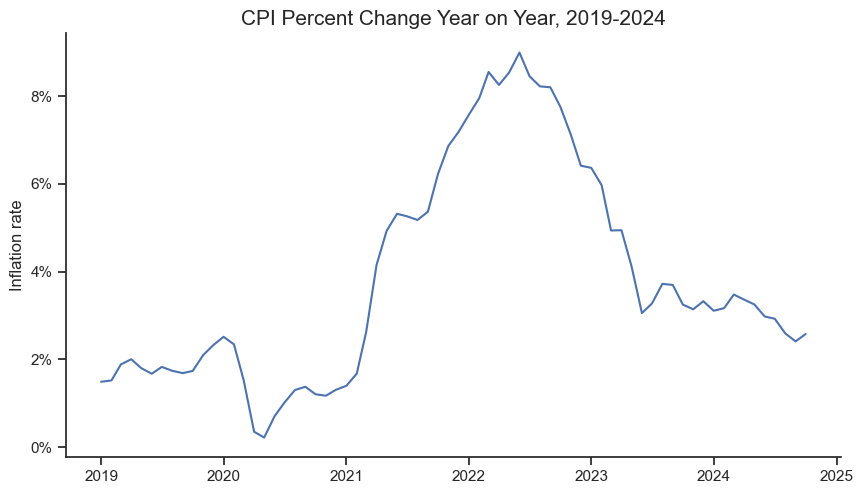

In [115]:
plt.figure(figsize=(10, 5.5))
sns.lineplot(data=earnings_cpi_clean, x=earnings_cpi_clean.index, y='Inflation rate')
sns.despine()

plt.title('CPI Percent Change Year on Year, 2019-2024', fontsize=15)
plt.xlabel('')

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y)}%'))
#by default, pandas uses the index for the x-axis

plt.show()

### Real Wage Growth & Inflation Rate 

In [116]:
earnings_cpi_data['Real wages'] = (earnings_cpi_data['Average Earnings'] / earnings_cpi_data['CPI']) * 100
earnings_cpi_data

,Average Earnings,CPI,Inflation rate,Real wages
2018-01-01,26.73,248.859,NaN,10.741022
2018-02-01,26.75,249.529,NaN,10.720197
2018-03-01,26.86,249.577,NaN,10.762210
2018-04-01,26.91,250.227,NaN,10.754235
2018-05-01,26.98,250.792,NaN,10.757919
...,...,...,...,...
2024-06-01,34.99,313.049,2.975629,11.177164
2024-07-01,35.07,313.534,2.923566,11.185390
2024-08-01,35.22,314.121,2.591227,11.212240
2024-09-01,35.33,314.686,2.407513,11.227064


In [117]:
earnings_cpi_data['Real wage growth'] = earnings_cpi_data['Real wages'].pct_change(periods=12) * 100
earnings_cpi_data

,Average Earnings,CPI,Inflation rate,Real wages,Real wage growth
2018-01-01,26.73,248.859,NaN,10.741022,NaN
2018-02-01,26.75,249.529,NaN,10.720197,NaN
2018-03-01,26.86,249.577,NaN,10.762210,NaN
2018-04-01,26.91,250.227,NaN,10.754235,NaN
2018-05-01,26.98,250.792,NaN,10.757919,NaN
...,...,...,...,...,...
2024-06-01,34.99,313.049,2.975629,11.177164,0.827637
2024-07-01,35.07,313.534,2.923566,11.185390,0.690985
2024-08-01,35.22,314.121,2.591227,11.212240,1.239814
2024-09-01,35.33,314.686,2.407513,11.227064,1.439053


In [118]:
rates_clean = earnings_cpi_data.dropna().copy()
rates_clean

,Average Earnings,CPI,Inflation rate,Real wages,Real wage growth
2019-01-01,27.59,252.561,1.487589,10.924094,1.704415
2019-02-01,27.71,253.319,1.518862,10.938777,2.038955
2019-03-01,27.80,254.277,1.883186,10.932959,1.586563
2019-04-01,27.78,255.233,2.000583,10.884173,1.208243
2019-05-01,27.86,255.296,1.795911,10.912823,1.439905
...,...,...,...,...,...
2024-06-01,34.99,313.049,2.975629,11.177164,0.827637
2024-07-01,35.07,313.534,2.923566,11.185390,0.690985
2024-08-01,35.22,314.121,2.591227,11.212240,1.239814
2024-09-01,35.33,314.686,2.407513,11.227064,1.439053


In [119]:
#rates_clean.plot(figsize=(11,6), kind='line', y=['Inflation rate', 'real wage growth'])

#ax=plt.gca()
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y)}%'))
#ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

#plt.show()

fig = px.line(rates_clean, x=rates_clean.index, y=['Inflation rate', 'Real wage growth'])
fig.update_layout(showlegend=True)
fig.update_layout(
    title='Real Wage Growth vs Inflation Rate',
    title_font_size=18.5,
    xaxis_title='',
    yaxis_title='Percent Change Year on Year', 
    legend_title_text=''
)

fig.update_layout(
    width=1000, height=550, 
    yaxis=dict(
        tickformat=".0",
        ticksuffix="%"     # Show percentages with 2 decimal points
    )
 )

fig.update_xaxes(
    dtick="M12",  # Interval of 12 months = 1 year
    tickformat="%Y"  # Format the ticks as years (e.g., 2005, 2006, etc.
)
# fig.update_layout(yaxis_tickformat='%')

fig.show()

![Real wage growth vs inflation rate](Images/realwagegrowth_inflation.png)